In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

sheet_id = "1GQ2wltXJ-veItC2BVoWJx7MmeS2mcljb62dVRrAMYZk"
sheet_name = "sheet1"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df = pd.read_csv(url,index_col=0)

df = df[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE', 'status']]

df.drop(['status'],axis=1,inplace=True)
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728


In [262]:
# Function to classify Parkinson's severity based on voice features
def pd_flag(row):
    pd_criteria = 0
    
    # Frequency (Jitter) abnormalities
    if row['MDVP:Jitter(%)'] > 0.5:
        pd_criteria += 1
    if row['MDVP:Jitter(Abs)'] > 0.005:
        pd_criteria += 1
    if row['MDVP:RAP'] > 0.005:
        pd_criteria += 1
    if row['MDVP:PPQ'] > 0.005:
        pd_criteria += 1
    if row['Jitter:DDP'] > 0.01:
        pd_criteria += 1

    # Amplitude (Shimmer) abnormalities
    if row['MDVP:Shimmer'] > 0.02:
        pd_criteria += 1
    if row['MDVP:Shimmer(dB)'] > 1:
        pd_criteria += 1
    if row['Shimmer:APQ3'] > 0.01:
        pd_criteria += 1
    if row['Shimmer:APQ5'] > 0.01:
        pd_criteria += 1
    if row['MDVP:APQ'] > 0.02:
        pd_criteria += 1
    if row['Shimmer:DDA'] > 0.02:
        pd_criteria += 1

    # Noise / signal irregularity
    if row['NHR'] > 0.2:
        pd_criteria += 1
    if row['HNR'] < 15:
        pd_criteria += 1
    if row['RPDE'] > 0.5:
        pd_criteria += 1
    if row['DFA'] > 1.0:
        pd_criteria += 1
    if row['spread1'] < -1:
        pd_criteria += 1
    if row['spread2'] > 1:
        pd_criteria += 1
    if row['D2'] > 4:
        pd_criteria += 1
    if row['PPE'] > 0.1:
        pd_criteria += 1

    # Severity classification
    if pd_criteria == 0:
        return 'normal'
    elif pd_criteria < 5:
        return 'mild'
    elif pd_criteria < 10:
        return 'moderate_pd'
    else:
        return 'severe_pd'


In [263]:
df['class'] = df.apply(pd_flag,axis=1)

In [264]:
df['class'].value_counts()

class
moderate_pd    98
mild           70
severe_pd      27
Name: count, dtype: int64

In [265]:
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE', 'class'],
      dtype='object')

In [266]:
import pandas as pd
import numpy as np

# Columns based on your Parkinson's dataset
columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
            'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
            'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
            'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
            'spread2', 'D2', 'PPE', 'class']

# Normal ranges based on the previous table
ranges = {
    'MDVP:Fo(Hz)': (100, 200),
    'MDVP:Fhi(Hz)': (150, 300),
    'MDVP:Flo(Hz)': (80, 150),
    'MDVP:Jitter(%)': (0, 0.5),
    'MDVP:Jitter(Abs)': (0, 0.005),
    'MDVP:RAP': (0, 0.005),
    'MDVP:PPQ': (0, 0.005),
    'Jitter:DDP': (0, 0.01),
    'MDVP:Shimmer': (0, 0.02),
    'MDVP:Shimmer(dB)': (0, 1),
    'Shimmer:APQ3': (0, 0.01),
    'Shimmer:APQ5': (0, 0.01),
    'MDVP:APQ': (0, 0.02),
    'Shimmer:DDA': (0, 0.02),
    'NHR': (0, 0.2),
    'HNR': (15, 25),
    'RPDE': (0, 0.5),
    'DFA': (0.5, 1.0),
    'spread1': (-1, 0),
    'spread2': (0, 1),
    'D2': (2, 4),
    'PPE': (0, 0.1),
    'class' : (0,0)
    
}
    

# Generate 50 samples of normal patients
data = []
for _ in range(50):
    sample = []
    for col in columns:
        low, high = ranges[col]
        if col == 'class':
            sample.append('normal')
        else:
            sample.append(np.round(np.random.uniform(low, high), 7))
    data.append(sample)

# Create DataFrame
normal_df = pd.DataFrame(data, columns=columns)
normal_df 


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,class
0,187.620683,271.940078,105.432436,0.183312,0.004072,0.003683,0.001947,0.009408,0.006288,0.052386,0.007532,0.002513,0.015954,0.013963,0.072089,17.809616,0.408934,0.643225,-0.611917,0.025175,2.667118,0.046354,normal
1,163.307033,242.900619,149.848580,0.051909,0.004398,0.004573,0.001075,0.004049,0.010800,0.228809,0.007448,0.008082,0.001365,0.014394,0.100987,16.119765,0.480041,0.735360,-0.454017,0.260613,3.656650,0.093556,normal
2,145.941105,260.437959,148.525304,0.427828,0.000026,0.001181,0.001077,0.007184,0.000107,0.982345,0.008086,0.006283,0.006174,0.003036,0.093515,15.465417,0.193777,0.591170,-0.260362,0.191261,2.143824,0.023020,normal
3,130.774327,237.196944,149.949350,0.072981,0.001481,0.004557,0.003874,0.001456,0.001554,0.687793,0.008827,0.003401,0.013760,0.007211,0.113858,18.513917,0.422580,0.976841,-0.492744,0.263488,2.875900,0.026695,normal
4,187.514162,201.486624,110.973787,0.317044,0.003967,0.002836,0.001175,0.006986,0.007794,0.922184,0.000833,0.002679,0.011053,0.007855,0.191293,22.479477,0.308553,0.876996,-0.212817,0.537708,3.831015,0.052414,normal
5,195.387503,181.942248,131.764928,0.422985,0.003033,0.004972,0.002142,0.000115,0.010636,0.729214,0.000508,0.005373,0.018377,0.004997,0.129289,15.190647,0.471073,0.904277,-0.242803,0.310695,2.937719,0.019447,normal
6,157.092008,169.405521,125.813531,0.222628,0.003962,0.004091,0.003464,0.001639,0.018194,0.511017,0.008265,0.003790,0.006025,0.014786,0.072329,19.475608,0.299574,0.507300,-0.430783,0.720038,3.030593,0.013286,normal
7,110.513054,186.287865,143.057909,0.076242,0.004162,0.001660,0.000497,0.009344,0.005566,0.409521,0.003732,0.007902,0.004329,0.008425,0.135433,19.459377,0.430958,0.774316,-0.624223,0.901489,3.956137,0.060668,normal
8,160.003773,191.404657,145.076599,0.035868,0.004387,0.004463,0.004360,0.009220,0.008532,0.142912,0.003448,0.002700,0.018413,0.000424,0.188229,17.102991,0.455778,0.914135,-0.312293,0.269374,3.624764,0.022962,normal
9,105.367948,271.102216,136.317274,0.367458,0.000135,0.002695,0.000248,0.001875,0.003810,0.856260,0.005916,0.005096,0.019102,0.000566,0.035192,17.728450,0.364931,0.711488,-0.708302,0.649477,3.099984,0.001734,normal


In [267]:
df = pd.concat([df,normal_df],axis=0)
df.reset_index(drop=True,inplace=True)

In [268]:
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,class
0,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,0.426000,0.021820,0.031300,0.029710,0.065450,0.022110,21.033000,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,moderate_pd
1,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,0.626000,0.031340,0.045180,0.043680,0.094030,0.019290,19.085000,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,moderate_pd
2,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,0.482000,0.027570,0.038580,0.035900,0.082700,0.013090,20.651000,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,severe_pd
3,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,0.517000,0.029240,0.040050,0.037720,0.087710,0.013530,20.644000,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,severe_pd
4,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,0.584000,0.034900,0.048250,0.044650,0.104700,0.017670,19.649000,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,severe_pd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,106.372904,234.669079,99.226308,0.066859,0.004853,0.001935,0.000063,0.007561,0.012981,0.750709,0.002631,0.002840,0.008107,0.012616,0.000758,17.243280,0.091032,0.797440,-0.071374,0.970989,3.024097,0.059575,normal
241,113.403170,287.198111,97.401607,0.210205,0.002264,0.004381,0.002378,0.007434,0.006393,0.103890,0.003924,0.003000,0.004368,0.009751,0.188844,23.661422,0.423590,0.772266,-0.949042,0.969183,2.625857,0.066544,normal
242,157.858907,217.234553,84.620073,0.078304,0.001747,0.004246,0.004991,0.009609,0.018999,0.822547,0.009418,0.001020,0.011611,0.001107,0.044086,20.268209,0.404225,0.739331,-0.250408,0.882370,2.798976,0.077166,normal
243,106.207534,297.495416,117.986340,0.202601,0.001460,0.002915,0.004147,0.009356,0.003481,0.044940,0.004444,0.009902,0.008109,0.007988,0.178885,15.757342,0.042909,0.698030,-0.184536,0.817999,2.269582,0.006636,normal


In [269]:
x = df.drop(['class'],axis=1)
y = df['class']

In [270]:
x

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,0.426000,0.021820,0.031300,0.029710,0.065450,0.022110,21.033000,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,0.626000,0.031340,0.045180,0.043680,0.094030,0.019290,19.085000,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,0.482000,0.027570,0.038580,0.035900,0.082700,0.013090,20.651000,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,0.517000,0.029240,0.040050,0.037720,0.087710,0.013530,20.644000,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,0.584000,0.034900,0.048250,0.044650,0.104700,0.017670,19.649000,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,106.372904,234.669079,99.226308,0.066859,0.004853,0.001935,0.000063,0.007561,0.012981,0.750709,0.002631,0.002840,0.008107,0.012616,0.000758,17.243280,0.091032,0.797440,-0.071374,0.970989,3.024097,0.059575
241,113.403170,287.198111,97.401607,0.210205,0.002264,0.004381,0.002378,0.007434,0.006393,0.103890,0.003924,0.003000,0.004368,0.009751,0.188844,23.661422,0.423590,0.772266,-0.949042,0.969183,2.625857,0.066544
242,157.858907,217.234553,84.620073,0.078304,0.001747,0.004246,0.004991,0.009609,0.018999,0.822547,0.009418,0.001020,0.011611,0.001107,0.044086,20.268209,0.404225,0.739331,-0.250408,0.882370,2.798976,0.077166
243,106.207534,297.495416,117.986340,0.202601,0.001460,0.002915,0.004147,0.009356,0.003481,0.044940,0.004444,0.009902,0.008109,0.007988,0.178885,15.757342,0.042909,0.698030,-0.184536,0.817999,2.269582,0.006636


In [271]:
for i in x.columns:
    px.histogram(df,x=i,color='class').show()

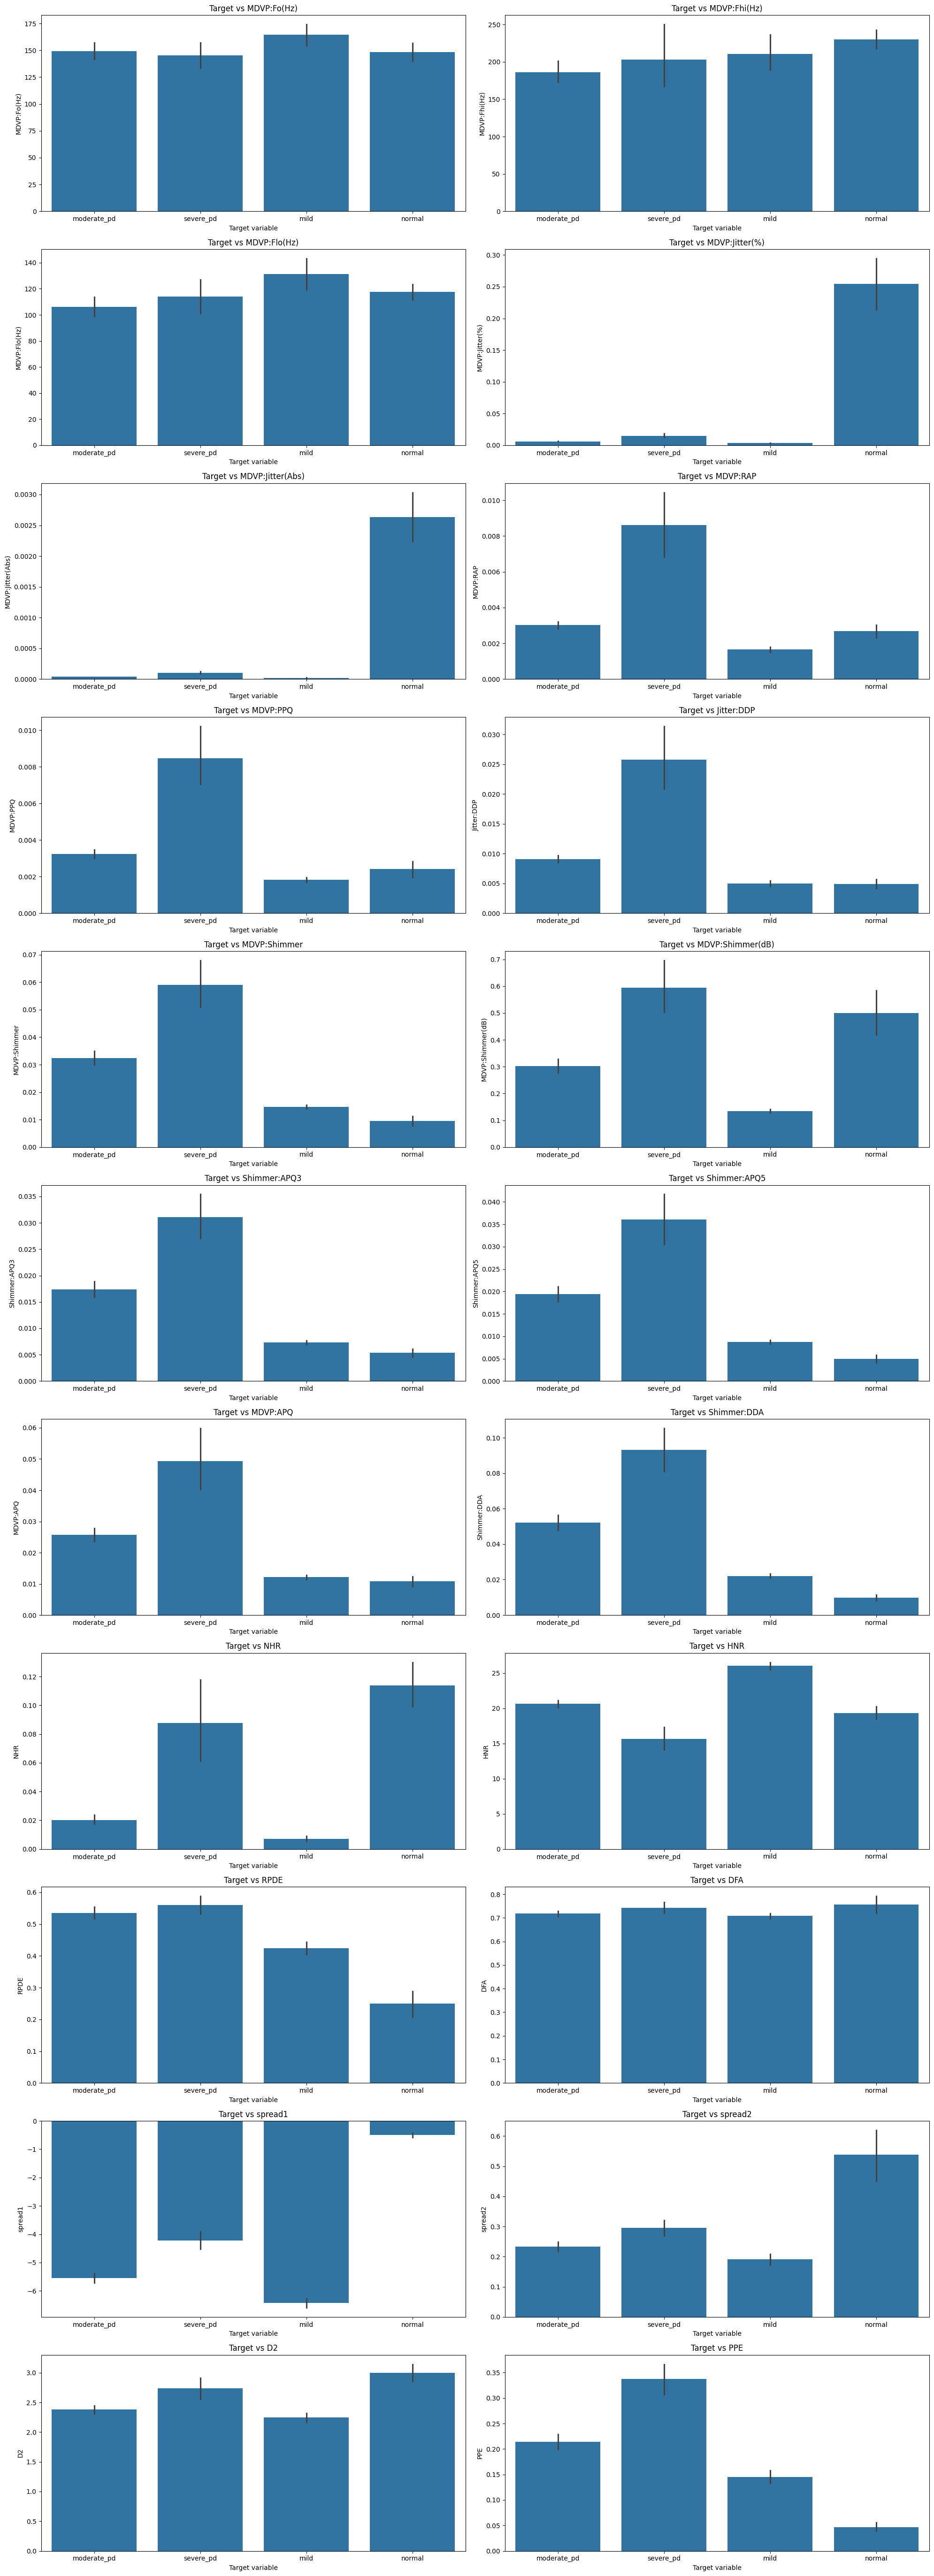

In [272]:
n_col =2 
n_row = (len(x.columns) + 1) // n_col

fig, ax = plt.subplots(n_row, n_col, figsize=(20, 5*n_row))
ax = ax.flatten()

for i,col in enumerate(x.columns):
    sns.barplot(df,x = 'class', y = col,ax = ax[i])
    ax[i].set_title(f"Target vs {col}")
    ax[i].set_xlabel("Target variable")
    
plt.tight_layout()
plt.show()

In [273]:
from scipy.stats import f_oneway

RL = []
for i in x.columns:

    print(25*'-',i,25*'-')
    # Test scores from 4 different classes
    class_a = df[df['class'] == 'normal'][i].to_list()
    class_b = df[df['class'] == 'mild'][i].to_list()
    class_c = df[df['class'] == 'moderate_pd'][i].to_list()
    class_d = df[df['class'] == 'severe_pd'][i].to_list()
    


    # Perform one-way ANOVA
    f_stat, p_val = f_oneway(class_a, class_b, class_c,class_d)

    print(f"F-statistic: {f_stat:.4f}")
    print(f"p-value: {p_val:.4f}")

    # Interpret result
    alpha = 0.05
    if p_val < alpha:
        print("Reject the null hypothesis: At least one group is significantly different.")
        RL.append(i)
    else:
        print("Fail to reject the null hypothesis: No significant difference.")
    
    print(50*"*")
print(RL)

------------------------- MDVP:Fo(Hz) -------------------------
F-statistic: 2.9848
p-value: 0.0319
Reject the null hypothesis: At least one group is significantly different.
**************************************************
------------------------- MDVP:Fhi(Hz) -------------------------
F-statistic: 3.2902
p-value: 0.0214
Reject the null hypothesis: At least one group is significantly different.
**************************************************
------------------------- MDVP:Flo(Hz) -------------------------
F-statistic: 5.8472
p-value: 0.0007
Reject the null hypothesis: At least one group is significantly different.
**************************************************
------------------------- MDVP:Jitter(%) -------------------------
F-statistic: 177.3656
p-value: 0.0000
Reject the null hypothesis: At least one group is significantly different.
**************************************************
------------------------- MDVP:Jitter(Abs) -------------------------
F-statistic: 202.068

In [274]:
len(df.columns),len(RL)

(23, 22)

In [275]:
y.value_counts()

class
moderate_pd    98
mild           70
normal         50
severe_pd      27
Name: count, dtype: int64

In [276]:
y = y.replace({
        'normal' : 0,
        'mild' : 1,
        'moderate_pd' : 2,
        'severe_pd' :3
    })

In [277]:
from sklearn.preprocessing import RobustScaler
RS = RobustScaler()
x_sc = pd.DataFrame(RS.fit_transform(x),columns=RS.get_feature_names_out())
x_sc

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.485507,-0.395684,-0.600217,0.234581,0.500000,0.551521,1.383178,0.694118,1.376572,0.662021,1.167347,1.798913,0.925479,1.080749,0.101739,-0.083639,-0.227954,0.977545,0.248749,0.207991,-0.215712,0.842546
1,-0.446139,-0.488879,0.158349,0.437225,0.666667,0.988142,2.046729,1.173109,2.358243,1.358885,2.092517,3.056159,1.916962,1.934003,0.035479,-0.408848,-0.007130,1.023519,0.543791,0.693118,0.073787,1.438292
2,-0.539621,-0.677799,0.114111,0.527533,0.833333,1.351227,2.443925,1.574790,1.855694,0.857143,1.726142,2.458333,1.364798,1.595746,-0.110198,-0.147412,-0.151373,1.086110,0.396643,0.521714,-0.151981,1.182749
3,-0.539719,-0.604984,0.110418,0.469163,0.833333,1.158195,2.056075,1.359664,2.000156,0.979094,1.888435,2.591486,1.493967,1.745319,-0.099859,-0.148581,-0.125660,1.020415,0.526872,0.682988,-0.053154,1.440426
4,-0.550542,-0.562868,0.096526,0.785242,1.166667,1.861384,3.037383,2.134454,2.520554,1.212544,2.438484,3.334239,1.985806,2.252555,-0.002585,-0.314691,-0.214915,1.066531,0.674711,-0.016426,-0.167718,1.733690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,-0.708161,0.437672,-0.126786,6.734515,80.216667,-0.259721,-1.176121,0.101042,-0.339073,1.793412,-0.697444,-0.779031,-0.607715,-0.496601,-0.399957,-0.716314,-1.868581,0.783863,2.144810,5.153518,0.912623,-0.753384
241,-0.593226,1.003486,-0.162440,22.521454,37.068333,0.864739,-0.094533,0.079731,-0.706514,-0.460314,-0.571778,-0.764484,-0.873130,-0.582144,4.019384,0.355162,-0.183323,0.510645,1.793854,5.140838,0.290822,-0.703972
242,0.133567,0.249877,-0.412186,7.994956,28.445000,0.802326,1.126729,0.445176,-0.003391,2.043717,-0.037940,-0.943813,-0.359063,-0.840207,0.618102,-0.211317,-0.281456,0.153194,2.073219,4.531422,0.561126,-0.628652
243,-0.710865,1.114403,0.239777,21.684031,23.673333,0.190918,0.732290,0.402706,-0.868975,-0.665716,-0.521283,-0.139275,-0.607594,-0.634788,3.785382,-0.964384,-2.112444,-0.295056,2.099559,4.079550,-0.265458,-1.128750


In [278]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size=0.25,
                                                 stratify=y,
                                                 random_state=42,
                                                 shuffle=True)

In [279]:
y_train.value_counts()

class
2    73
1    52
0    38
3    20
Name: count, dtype: int64

In [280]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler()
x_train, y_train = ROS.fit_resample(x_train, y_train)

y_train.value_counts()

class
2    73
1    73
3    73
0    73
Name: count, dtype: int64

In [281]:
x_train.duplicated().sum()

np.int64(109)

In [282]:
# importing models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,confusion_matrix

In [283]:
# Assign the models to a dictionary
model = {
    'LogisticRegression' : LogisticRegression(class_weight='balanced'),
    'SVC' : SVC(class_weight='balanced'),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(class_weight='balanced'),
    'RandomForestClassifier' : RandomForestClassifier(class_weight='balanced'),
    'GaussianNB' : GaussianNB(),
    
}

LogisticRegression
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       0.97      1.00      0.99        73
           2       0.91      0.95      0.93        73
           3       0.97      0.90      0.94        73

    accuracy                           0.96       292
   macro avg       0.96      0.96      0.96       292
weighted avg       0.96      0.96      0.96       292

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.89      0.94        18
           2       0.88      0.92      0.90        25
           3       0.75 

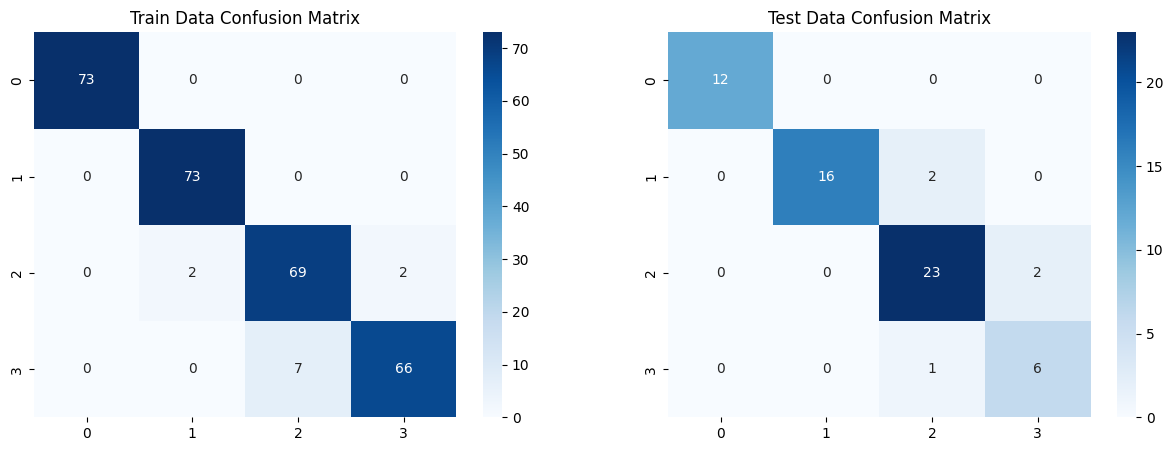

***************************************************************************
SVC
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       0.73      1.00      0.84        73
           2       0.62      0.62      0.62        73
           3       0.98      0.63      0.77        73

    accuracy                           0.81       292
   macro avg       0.83      0.81      0.81       292
weighted avg       0.83      0.81      0.81       292

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.82      1.00      0.90        18
           2     

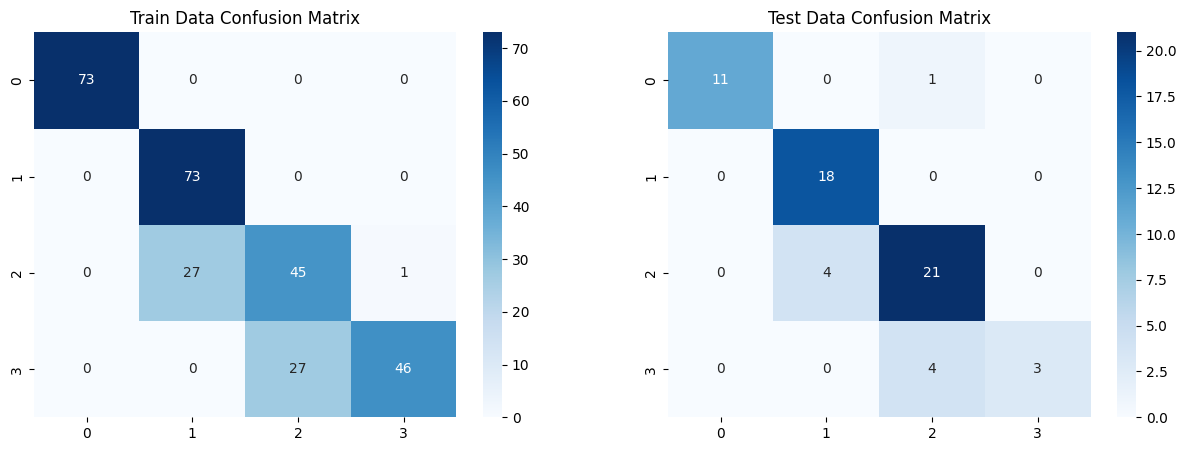

***************************************************************************
KNeighborsClassifier
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       0.95      0.99      0.97        73
           2       0.95      0.84      0.89        73
           3       0.90      0.97      0.93        73

    accuracy                           0.95       292
   macro avg       0.95      0.95      0.95       292
weighted avg       0.95      0.95      0.95       292

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.89      0.89      0.89        18


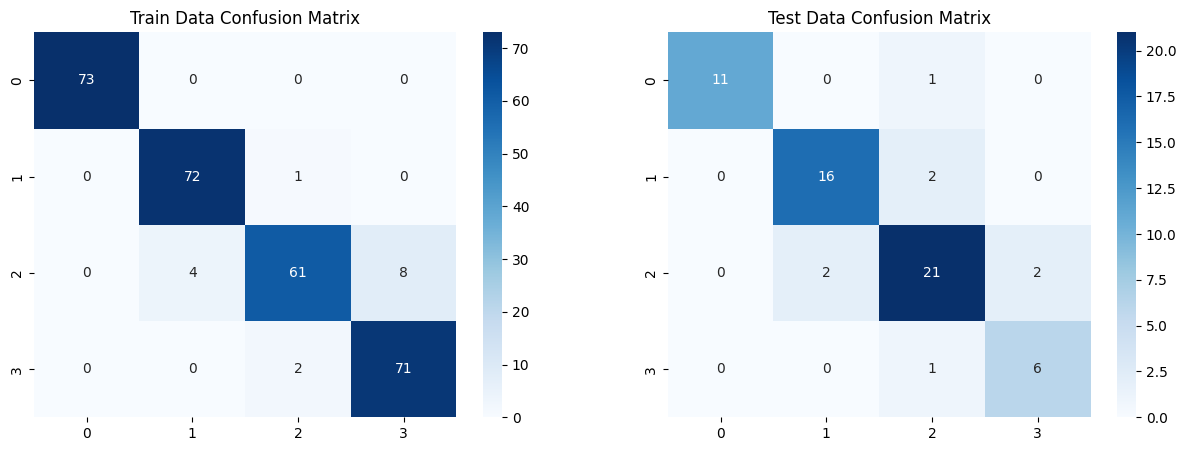

***************************************************************************
DecisionTreeClassifier
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        73
           3       1.00      1.00      1.00        73

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.94      0.83      0.88        1

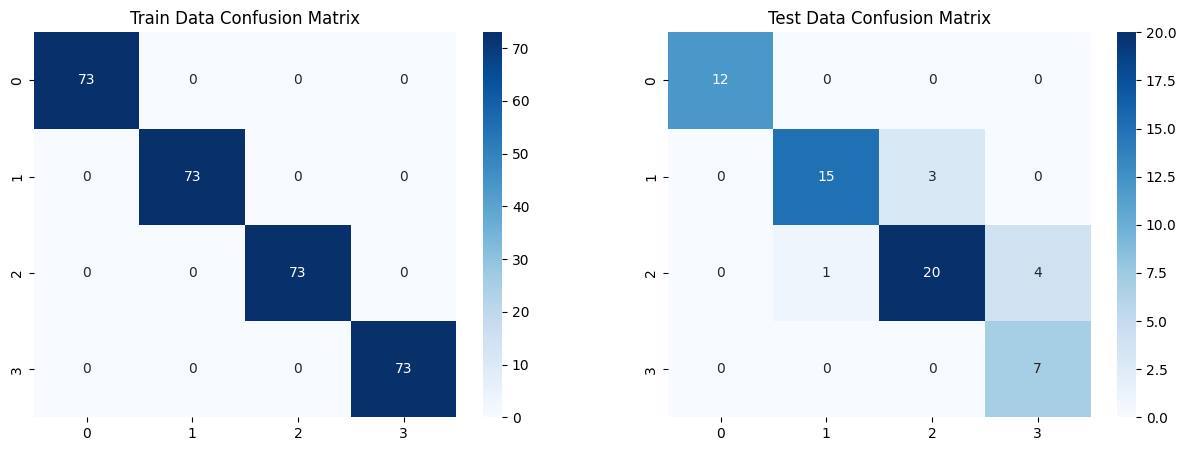

***************************************************************************
RandomForestClassifier
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        73
           3       1.00      1.00      1.00        73

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.83      0.86        1

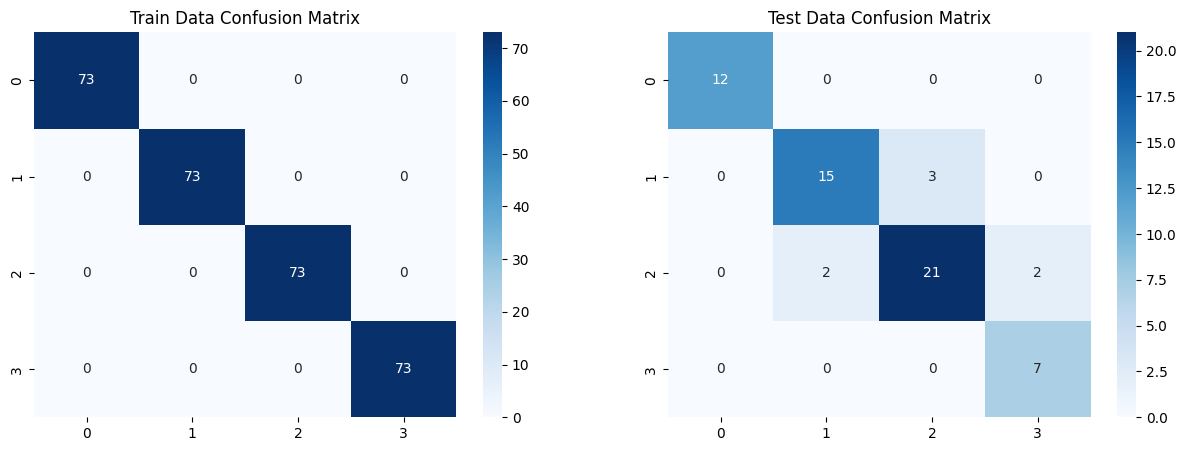

***************************************************************************
GaussianNB
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       0.96      0.97      0.97        73
           2       0.78      0.89      0.83        73
           3       0.92      0.78      0.84        73

    accuracy                           0.91       292
   macro avg       0.92      0.91      0.91       292
weighted avg       0.92      0.91      0.91       292

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.94      0.94      0.94        18
          

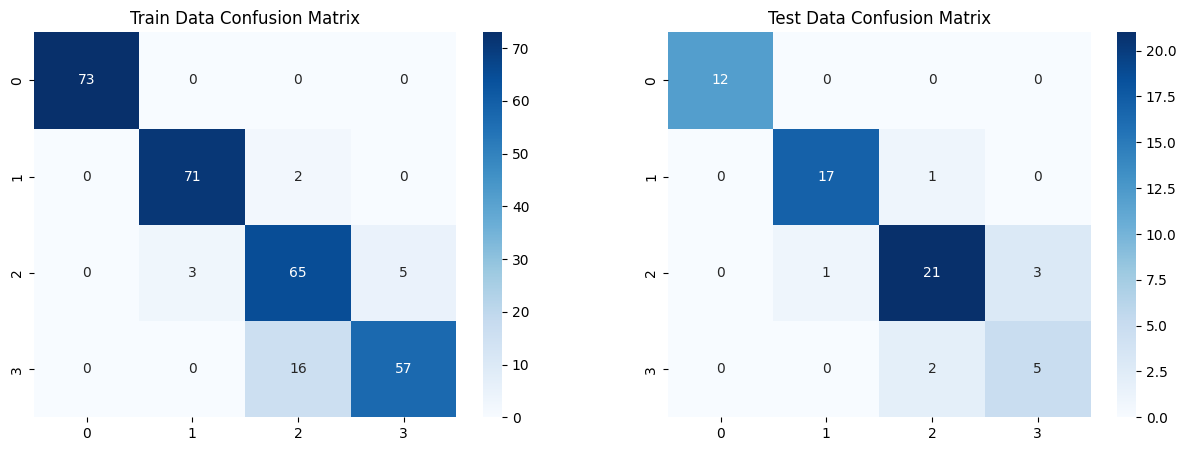

***************************************************************************


In [284]:
for i in model:
    print(i)
    print(75*'*')
    model[i].fit(x_train,y_train)
    y_train_pread = model[i].predict(x_train)
    y_test_pread = model[i].predict(x_test)
    
    print(25*"-","Train Data Matrix Report",25*"-")

    print(classification_report(y_train, y_train_pread))
    print(75*"-")
    print(25*"-","Test Data Matrix Report",25*"-")
    print(classification_report(y_test, y_test_pread))
    print(75*"-")

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
    ax[0].set_title('Train Data Confusion Matrix')

    sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
    ax[1].set_title('Test Data Confusion Matrix')

    plt.show()
    print(75*'*')


In [285]:
help(RandomForestClassifier())

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |
 |  A random forest classifier.
 |
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeClassifier`.
 |  The sub-sample size is controlled with the `max_samples` parameter 

------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        73
           3       1.00      1.00      1.00        73

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      0.89      0.89        18
           2       0.88      0.84      0.86        25
           3       0.75      0.86      0.80         7

    accuracy                           0.89        62
   macro a

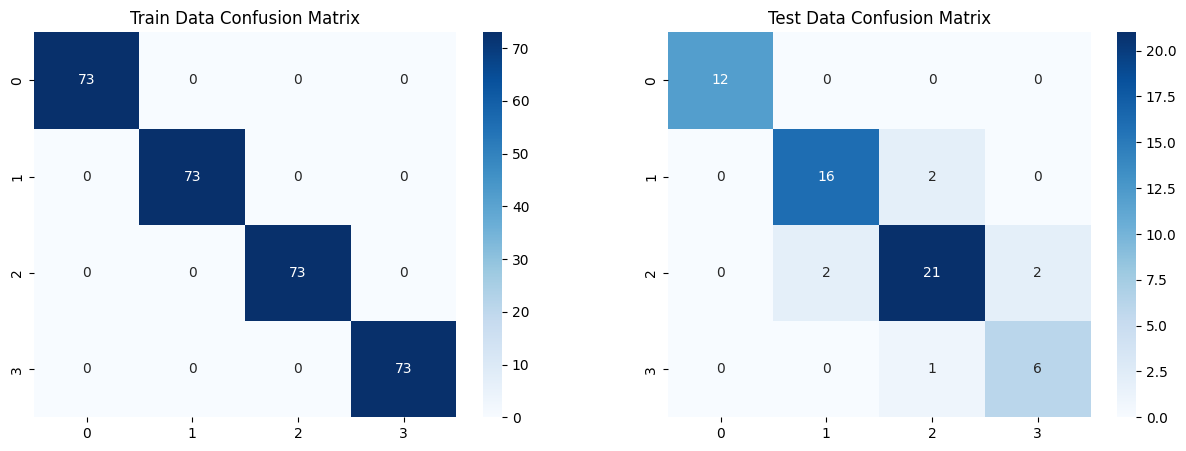

***************************************************************************


In [286]:
RFC =  RandomForestClassifier()
RFC.fit(x_train,y_train)
y_train_pread = RFC.predict(x_train)
y_test_pread = RFC.predict(x_test)

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

plt.show()
print(75*'*')


## Create pipline 

In [287]:
# Importing libraries for pipline bilding
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

In [288]:
x_trans = Pipeline(
    steps=[
        ('imputer',KNNImputer(n_neighbors = 5)),
        ('scalar',RobustScaler())
    ]
)
x_trans

,steps,"[('imputer', ...), ('scalar', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,n_neighbors,5
,weights,'uniform'
,metric,'nan_euclidean'
,copy,True
,add_indicator,False
,keep_empty_features,False


In [289]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', x_trans, x.columns)
    ]
)
preprocess

,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,n_neighbors,5
,weights,'uniform'


In [290]:
from imblearn.pipeline import Pipeline

In [291]:
model = Pipeline(
    steps=[
        ('preprocess',preprocess),
        ('over_sample',RandomOverSampler(random_state=42)),
        ('LogisticRegression',LogisticRegression(
            
            class_weight={
                0: 1.0,
                1: 1.0,
                2: 3.0,
                3: 3.0 
            }
            )
        )
    ]
)
model

,steps,"[('preprocess', ...), ('over_sample', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [292]:
x = df.drop(['class'],axis=1)
y = df['class'].apply(lambda x: 0 if x == 'normal' else(
                                1 if x == 'mild' else (
                                    2 if x== 'moderate_pd'
                                    else 3
                                )))

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                 stratify=y,
                                                 random_state=42,
                                                 shuffle=True)


In [293]:
x

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,0.426000,0.021820,0.031300,0.029710,0.065450,0.022110,21.033000,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,0.626000,0.031340,0.045180,0.043680,0.094030,0.019290,19.085000,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,0.482000,0.027570,0.038580,0.035900,0.082700,0.013090,20.651000,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,0.517000,0.029240,0.040050,0.037720,0.087710,0.013530,20.644000,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,0.584000,0.034900,0.048250,0.044650,0.104700,0.017670,19.649000,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,106.372904,234.669079,99.226308,0.066859,0.004853,0.001935,0.000063,0.007561,0.012981,0.750709,0.002631,0.002840,0.008107,0.012616,0.000758,17.243280,0.091032,0.797440,-0.071374,0.970989,3.024097,0.059575
241,113.403170,287.198111,97.401607,0.210205,0.002264,0.004381,0.002378,0.007434,0.006393,0.103890,0.003924,0.003000,0.004368,0.009751,0.188844,23.661422,0.423590,0.772266,-0.949042,0.969183,2.625857,0.066544
242,157.858907,217.234553,84.620073,0.078304,0.001747,0.004246,0.004991,0.009609,0.018999,0.822547,0.009418,0.001020,0.011611,0.001107,0.044086,20.268209,0.404225,0.739331,-0.250408,0.882370,2.798976,0.077166
243,106.207534,297.495416,117.986340,0.202601,0.001460,0.002915,0.004147,0.009356,0.003481,0.044940,0.004444,0.009902,0.008109,0.007988,0.178885,15.757342,0.042909,0.698030,-0.184536,0.817999,2.269582,0.006636


In [294]:
df['class'].value_counts()

class
moderate_pd    98
mild           70
normal         50
severe_pd      27
Name: count, dtype: int64

In [295]:
model.fit(x_train,y_train)

,steps,"[('preprocess', ...), ('over_sample', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        52
           2       0.99      0.97      0.98        73
           3       0.90      0.95      0.93        20

    accuracy                           0.98       183
   macro avg       0.97      0.98      0.98       183
weighted avg       0.98      0.98      0.98       183

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       1.00      0.89      0.94        18
           2       0.86      0.96      0.91        25
           3       0.86      0.86      0.86         7

    accuracy                           0.92        62
   macro a

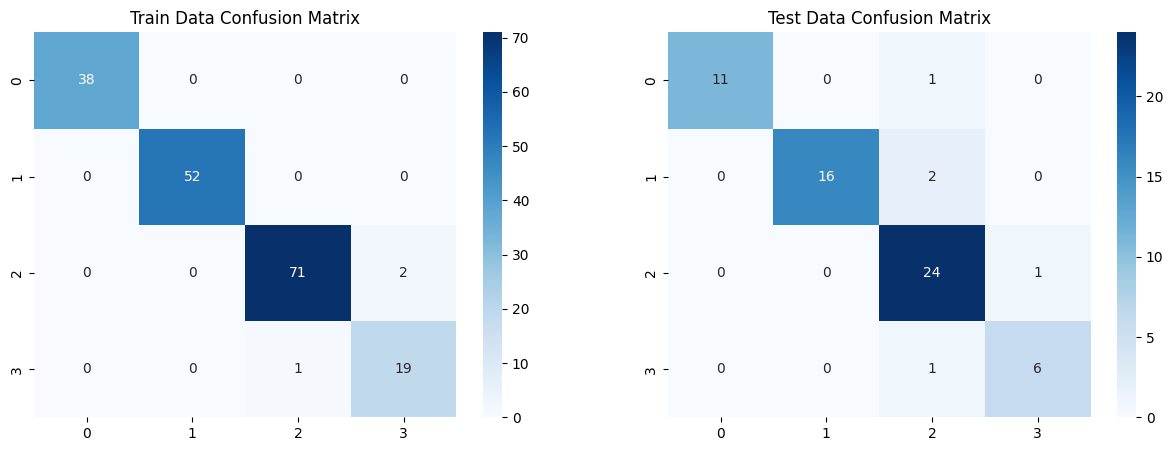

***************************************************************************


In [296]:
y_train_pread = model.predict(x_train)
y_test_pread = model.predict(x_test)

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

plt.show()
print(75*'*')

In [297]:
import pickle

pickle.dump(model,open('parkinsons_model.pkl','wb'))


In [301]:
x1,y1 = ROS.fit_resample(x,y)

In [306]:
len(model.predict(x1))

392

In [305]:
print(classification_report(y1,model.predict(x1)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        98
           1       1.00      0.97      0.98        98
           2       0.89      0.97      0.93        98
           3       0.97      0.93      0.95        98

    accuracy                           0.96       392
   macro avg       0.96      0.96      0.96       392
weighted avg       0.96      0.96      0.96       392

